<a href="https://colab.research.google.com/github/udayaprakash61/1CD22AI061/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

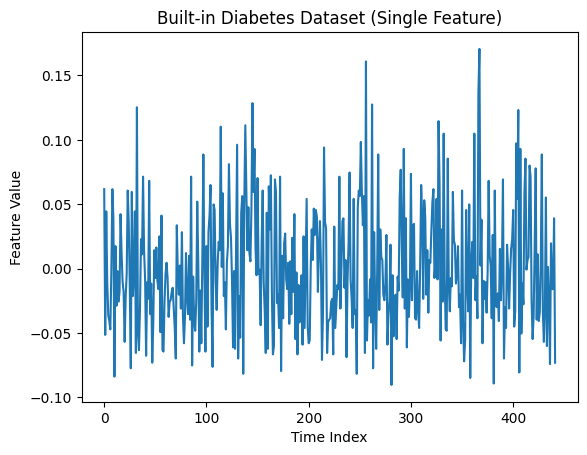

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1356
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0519
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0310
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0339
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0301
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0306
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0349
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0336
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0388
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0331
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0301
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0285
Epoch 13/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0332
Epoch 14/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331
Epoch 15/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0333
Epoc

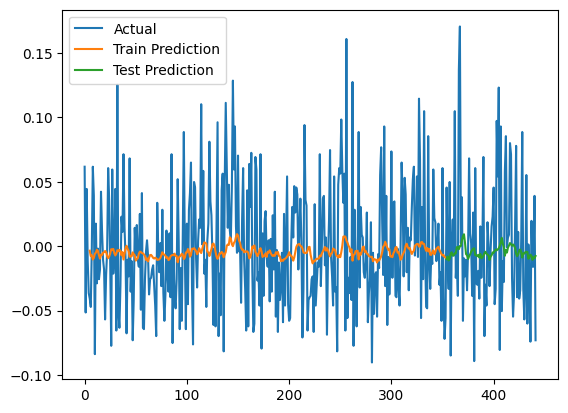

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

# ----------------------------
# Load BUILT-IN Dataset
# ----------------------------
data = load_diabetes()
values = data.data[:, 2]   # use one feature as time-series
values = values.reshape(-1, 1).astype('float32')

plt.plot(values)
plt.title('Built-in Diabetes Dataset (Single Feature)')
plt.xlabel('Time Index')
plt.ylabel('Feature Value')
plt.show()

# ----------------------------
# Scaling
# ----------------------------
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

# ----------------------------
# Create Sequences
# ----------------------------
def create_dataset(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 5
X, y = create_dataset(values, TIME_STEPS)

# ----------------------------
# Train-Test Split
# ----------------------------
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], TIME_STEPS, 1))
X_test = X_test.reshape((X_test.shape[0], TIME_STEPS, 1))

# ----------------------------
# LSTM Model
# ----------------------------
model = Sequential()
model.add(LSTM(20, input_shape=(TIME_STEPS, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

# ----------------------------
# Train Model
# ----------------------------
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# ----------------------------
# Prediction
# ----------------------------
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse Scaling
train_pred = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)

test_pred = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ----------------------------
# RMSE
# ----------------------------
print('Train RMSE:', math.sqrt(mean_squared_error(y_train_inv, train_pred)))
print('Test RMSE :', math.sqrt(mean_squared_error(y_test_inv, test_pred)))

# ----------------------------
# Plot
# ----------------------------
train_plot = np.empty_like(values)
train_plot[:] = np.nan
train_plot[TIME_STEPS:len(train_pred)+TIME_STEPS] = train_pred

test_plot = np.empty_like(values)
test_plot[:] = np.nan
test_plot[TIME_STEPS + len(train_pred) : TIME_STEPS + len(train_pred) + len(test_pred)] = test_pred

plt.plot(scaler.inverse_transform(values), label='Actual')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.legend()
plt.show()